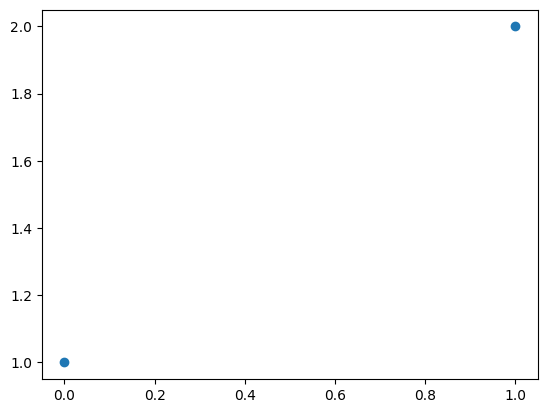

In [3]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/flagellar/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
fls.profiling=False
plt.scatter([0,1],[1,2])

In [7]:
model = fls.dill_load(fls.temp_dir + 'model_3.pickle')
data = fls.dill_load(fls.temp_dir + 'data_3.pickle')
data = data[30:]
to_remove = []
for i_d in range(len(data)):
    pass
    if 'tom' in data[i_d].name:
        to_remove.append(i_d)
for i_d in list(reversed(to_remove)):
    del data[i_d]
data = data[0:1]
        
ref_data = []
all_data = fls.load_all_train_data() + fls.load_all_extra_data()
for d in data:
    for r in all_data:
        if d.name == r.name:
            ref_data.append(r)

[    0.31623     0.38805     0.47619     0.58434     0.71706     0.87992      1.0798       1.325       1.626      1.9953]


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs


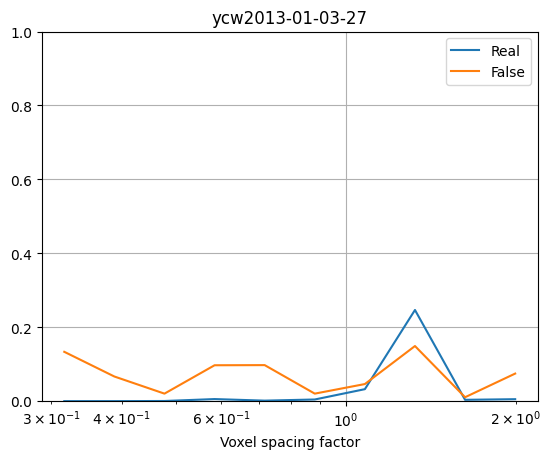

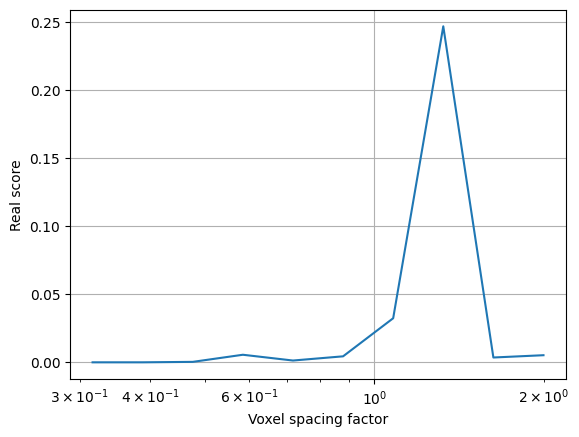

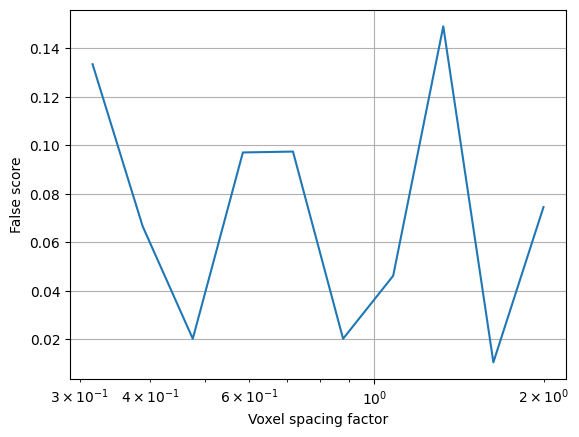

In [8]:
import io
import contextlib
voxel_spacing_vals = np.logspace(-0.5,0.3,10)
print(voxel_spacing_vals)
real_score = np.zeros((len(voxel_spacing_vals), len(data)))
false_score = np.zeros((len(voxel_spacing_vals), len(data)))
for i_d in range(len(data)):
    for i_v in range(len(voxel_spacing_vals)):    
        with contextlib.redirect_stdout(io.StringIO()) as f:
            d = copy.deepcopy(data[i_d])
            d.voxel_spacing *= voxel_spacing_vals[i_v]        
            d = model.infer([d])[0]
            d.labels_unfiltered = d.labels_unfiltered2
            fls.mark_tf_pn([d], ref_data[i_d:i_d+1])
            tp = d.labels_unfiltered[d.labels_unfiltered['tf_pn']==0.]
            if len(tp>0):
                real_score[i_v,i_d] = np.max(tp['confidence'])
            else:
                real_score[i_v,i_d] = 0.
            fp = d.labels_unfiltered[d.labels_unfiltered['tf_pn']==1.]
            if len(fp>0):
                false_score[i_v,i_d] = np.max(fp['confidence'])
            else:
                false_score[i_v,i_d] = 0.

    plt.figure()
    plt.semilogx(voxel_spacing_vals, real_score[:,i_d])
    plt.semilogx(voxel_spacing_vals, false_score[:,i_d])
    plt.xlabel('Voxel spacing factor')
    plt.legend(('Real', 'False'))
    plt.ylim([0,1])
    plt.grid(True)    
    plt.title(data[i_d].name)
    plt.pause(0.001)

plt.figure()
plt.semilogx(voxel_spacing_vals, real_score)
plt.xlabel('Voxel spacing factor')
plt.ylabel('Real score')
plt.grid(True)

plt.figure()
plt.semilogx(voxel_spacing_vals, false_score)
plt.xlabel('Voxel spacing factor')
plt.ylabel('False score')
plt.grid(True)

In [16]:
import flg_model
importlib.reload(flg_model)
model2 = flg_model.TestTimeAugmentation()
model2.voxel_spacing_scale_vals = list(voxel_spacing_vals)
model2.model_internal = model
model2.train([], [])
model2.infer(data)

Clearing pytorch
Clearing cupy
Processing tomogram ycw2013-01-03-27 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  279  853   58    0.133423
1  273  124  103    0.005642
2  268  334   30    0.001668

Clearing pytorch
Clearing cupy
Processing tomogram ycw2013-01-03-27 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  273  115  109    0.066589
1  278  730   93    0.006264
2  267  278   14    0.004486
3  267  601  533    0.001028

Clearing pytorch
Clearing cupy
Processing tomogram ycw2013-01-03-27 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  273  114  112    0.020248
1  269  256  568    0.007812
2  271  775   31    0.006462
3  267  605  524    0.005322
4  269  297   23    0.004417
5  267  214  244    0.000724
6  265  404  516    0.000213

Clearing pytorch
Clearing cupy
Processing tomogram ycw2013-01-03-27 (1/1)
Processing 17 out of 17 slices (CONCENTRATI

[DataExtra(is_train=True, name='ycw2013-01-03-27', labels=   index    z    y    x  confidence     value
 0      0  269  193  409    0.246582  0.246582, negative_labels=Empty DataFrame
 Columns: []
 Index: [], labels_unfiltered=     z    y    x  confidence
 0  269  193  409    0.246582
 1  272  789   49    0.149048
 2  265  733  473    0.040100
 3  278  303  338    0.029205
 4  266  497  249    0.006004
 5  281  347    6    0.004700
 6  276  304  523    0.003551, labels_unfiltered2=       z    y    x  confidence  i_model
 0    265  733  473    0.040100        0
 5    266  497  249    0.006004        0
 14   267  195  407    0.003443        0
 33   268  195  406    0.023239        0
 34   268  194  403    0.005081        0
 35   268  301  350    0.002714        0
 47   269  193  409    0.246582        0
 48   269  194  406    0.039948        0
 49   270  194  406    0.067322        0
 50   270  193  409    0.006439        0
 51   270  786   50    0.003273        0
 54   271  194  403    